In [3]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

The dimensions of the image are 429 x 474
Is ImJPG of integer type? True
The maximum pixel value in the image is 255
The minimum pixel value in the image is 0


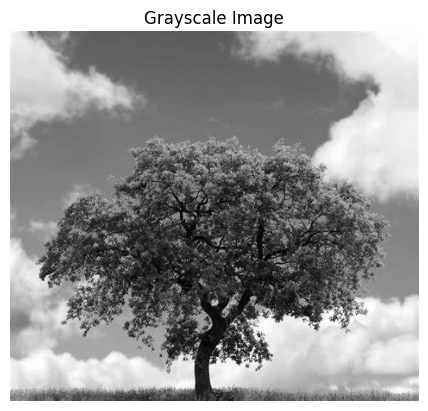

In [4]:


# URL of the image
image_url = "https://th.bing.com/th/id/OIP.XeDp5SDJJL5ajss_JDzjMgHaGt?rs=1&pid=ImgDetMain"

# Download the image
response = requests.get(image_url)
if response.status_code == 200:
    im = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
    ImJPG = np.array(im)

    m, n = ImJPG.shape
    isInt = np.issubdtype(ImJPG.dtype, np.integer)
    maxImJPG = np.max(ImJPG)
    minImJPG = np.min(ImJPG)

    print(f'The dimensions of the image are {m} x {n}')
    print(f'Is ImJPG of integer type? {isInt}')
    print(f'The maximum pixel value in the image is {maxImJPG}')
    print(f'The minimum pixel value in the image is {minImJPG}')

    plt.imshow(ImJPG, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()
else:
    print("Failed to download the image.")


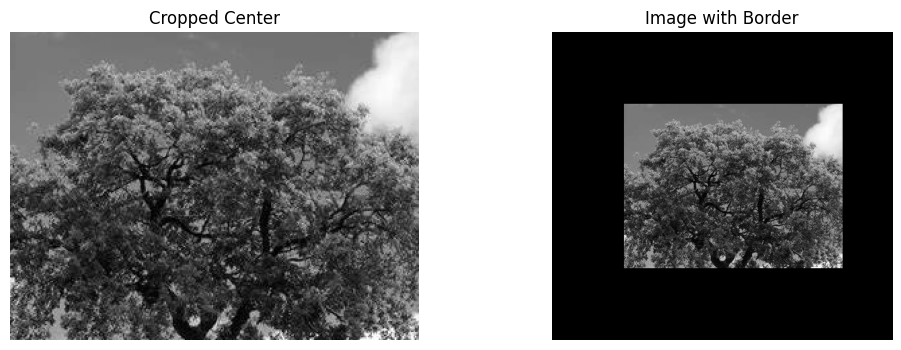

In [5]:
# Crop the central part of the image
ImJPG_center = ImJPG[100:m-100, 100:n-70]

# Create a zero matrix and paste the cropped image
ImJPG_border = np.zeros((m, n), dtype=np.uint8)
ImJPG_border[100:m-100, 100:n-70] = ImJPG_center

# Display both images
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(ImJPG_center, cmap='gray')
plt.title('Cropped Center')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ImJPG_border, cmap='gray')
plt.title('Image with Border')
plt.axis('off')
plt.show()

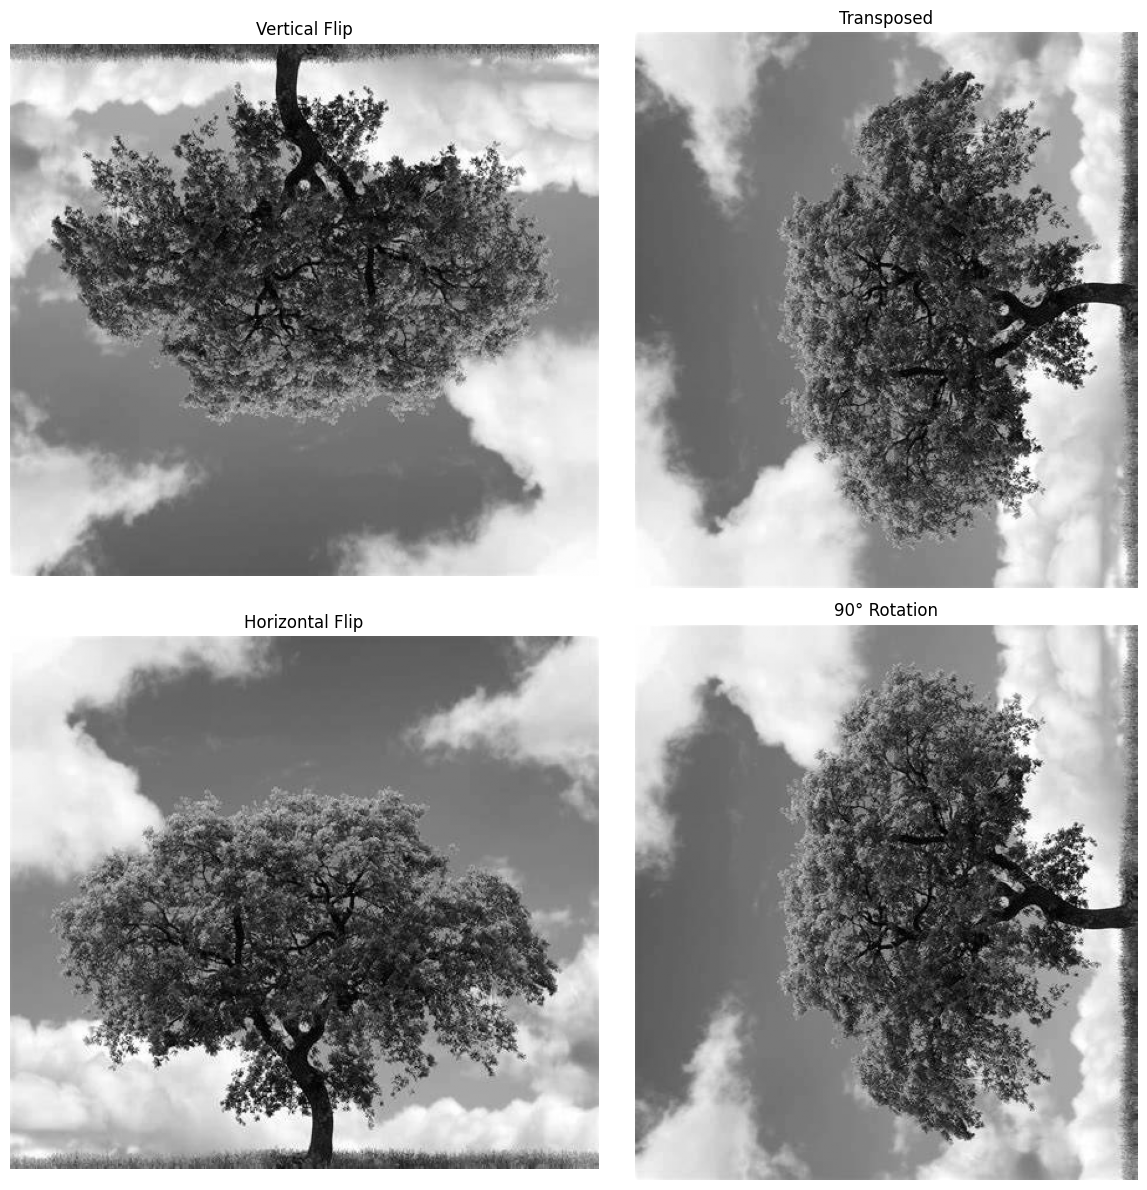

In [6]:
# Vertical flip
ImJPG_vertflip = np.flipud(ImJPG)

# Transpose
ImJPG_transpose = ImJPG.T

# Horizontal flip
ImJPG_horflip = np.fliplr(ImJPG)

# 90-degree rotation
ImJPG90 = np.rot90(ImJPG)

# Display transformations
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0, 0].imshow(ImJPG_vertflip, cmap='gray')
axes[0, 0].set_title('Vertical Flip')
axes[0, 0].axis('off')

axes[0, 1].imshow(ImJPG_transpose, cmap='gray')
axes[0, 1].set_title('Transposed')
axes[0, 1].axis('off')

axes[1, 0].imshow(ImJPG_horflip, cmap='gray')
axes[1, 0].set_title('Horizontal Flip')
axes[1, 0].axis('off')

axes[1, 1].imshow(ImJPG90, cmap='gray')
axes[1, 1].set_title('90° Rotation')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

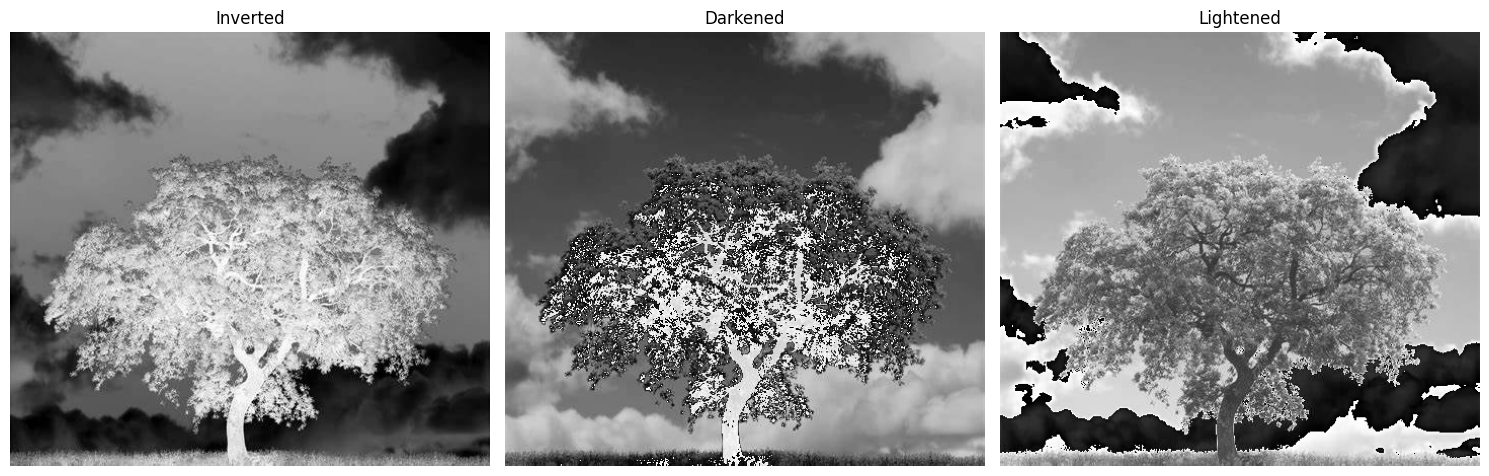

In [7]:
# Color inversion
ImJPG_inv = 255 - ImJPG

# Darken and lighten
ImJPG_dark = np.clip(ImJPG - 50, 0, 255)
ImJPG_light = np.clip(ImJPG + 50, 0, 255)

# Display color manipulations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(ImJPG_inv, cmap='gray')
axes[0].set_title('Inverted')
axes[0].axis('off')

axes[1].imshow(ImJPG_dark, cmap='gray')
axes[1].set_title('Darkened')
axes[1].axis('off')

axes[2].imshow(ImJPG_light, cmap='gray')
axes[2].set_title('Lightened')
axes[2].axis('off')

plt.tight_layout()
plt.show()

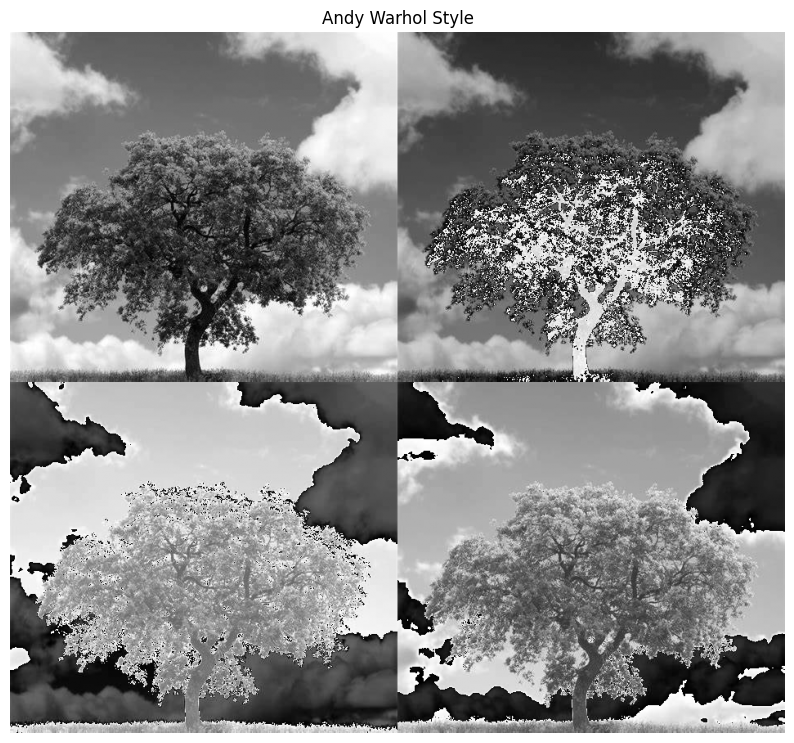

In [8]:
# Create variations
ImJPG_dark = np.clip(ImJPG - 50, 0, 255)
ImJPG_light_100 = np.clip(ImJPG + 100, 0, 255)
ImJPG_light_50 = np.clip(ImJPG + 50, 0, 255)

# Arrange in 2x2 grid
top_row = np.concatenate((ImJPG, ImJPG_dark), axis=1)
bottom_row = np.concatenate((ImJPG_light_100, ImJPG_light_50), axis=1)
ImJPG_Warhol = np.concatenate((top_row, bottom_row), axis=0)

# Display result
plt.figure(figsize=(10, 10))
plt.imshow(ImJPG_Warhol, cmap='gray')
plt.title('Andy Warhol Style')
plt.axis('off')
plt.show()


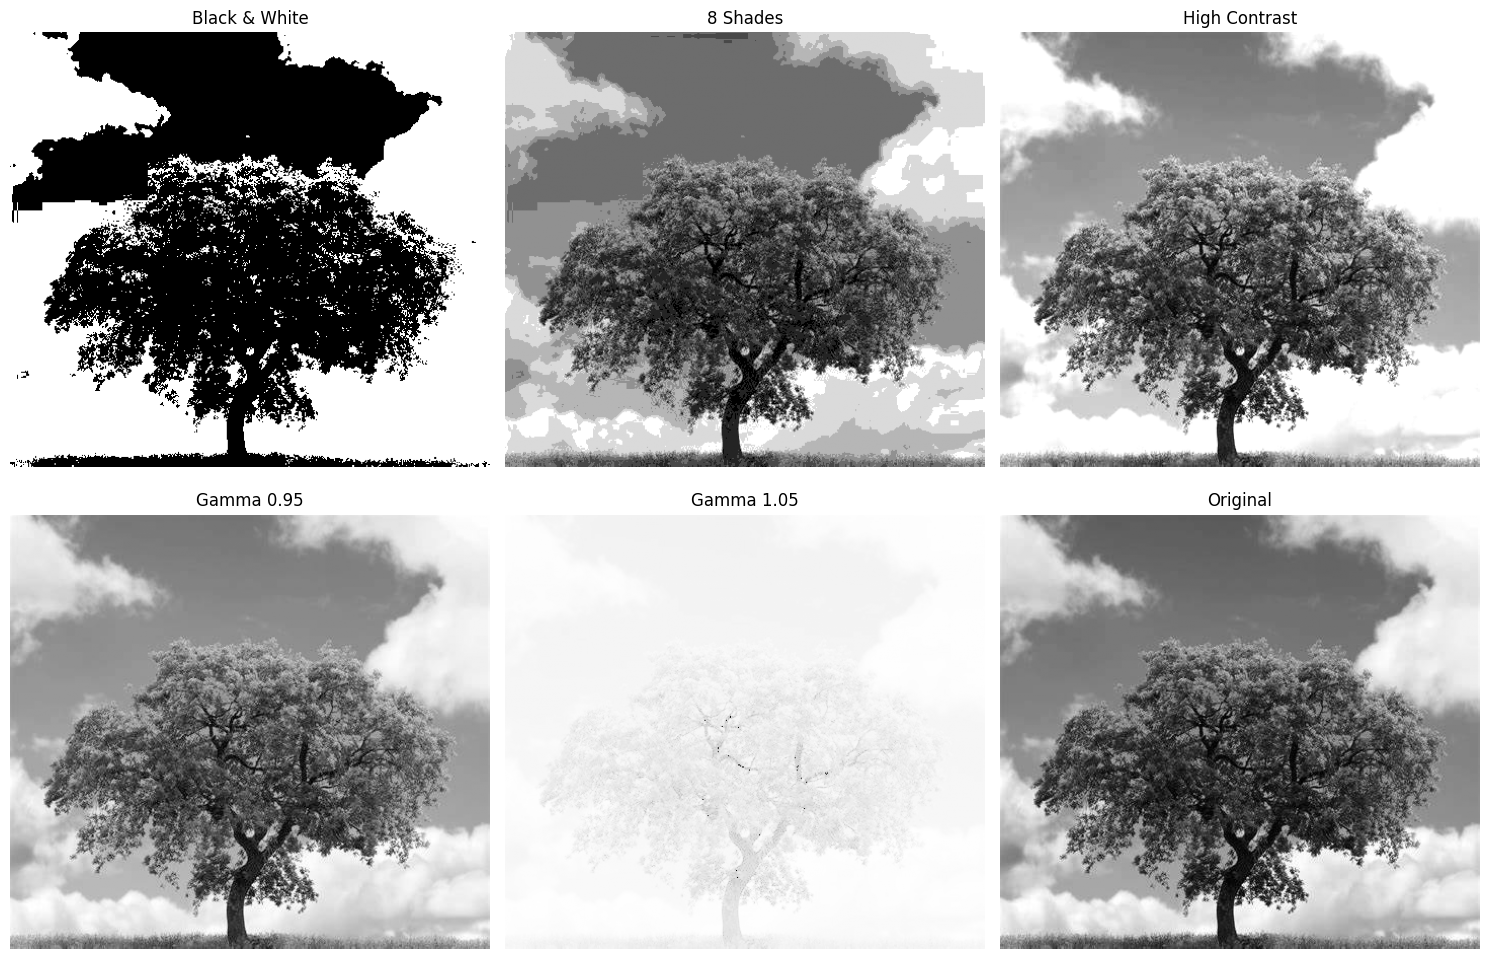

In [9]:
# Black and white conversion
ImJPG_bw = np.uint8(255 * np.floor(ImJPG / 128))

# Reduce to 8 shades
ImJPG8 = np.uint8(np.round(ImJPG / 255 * 7) * (255 / 7))

# High contrast
ImJPG_HighContrast = np.clip(ImJPG * 1.25, 0, 255).astype(np.uint8)

# Gamma corrections
ImJPG_Gamma05 = np.clip((ImJPG / 255.0) ** 0.75 * 255, 0, 255).astype(np.uint8)
ImJPG_Gamma15 = np.clip((ImJPG / 255.0) ** 0.05 * 255, 0, 255).astype(np.uint8)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(ImJPG_bw, cmap='gray')
axes[0, 0].set_title('Black & White')
axes[0, 0].axis('off')

axes[0, 1].imshow(ImJPG8, cmap='gray')
axes[0, 1].set_title('8 Shades')
axes[0, 1].axis('off')

axes[0, 2].imshow(ImJPG_HighContrast, cmap='gray')
axes[0, 2].set_title('High Contrast')
axes[0, 2].axis('off')

axes[1, 0].imshow(ImJPG_Gamma05, cmap='gray')
axes[1, 0].set_title('Gamma 0.95')
axes[1, 0].axis('off')

axes[1, 1].imshow(ImJPG_Gamma15, cmap='gray')
axes[1, 1].set_title('Gamma 1.05')
axes[1, 1].axis('off')

axes[1, 2].imshow(ImJPG, cmap='gray')
axes[1, 2].set_title('Original')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()